<a href="https://colab.research.google.com/github/gabrielafsz/Projetos-Inova-Talentos/blob/main/Caso_iFood_DADArq.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import missingno as msno 
import plotly.express as px

In [2]:
url ='https://raw.githubusercontent.com/ifood/ifood-data-business-analyst-test/master/ml_project1_data.csv'
df = pd.read_csv(url)

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,3,11,0


Verificação do tipo das colunas para avaliar a necessidade de ajuste, por exemplo, se colunas categóricas podem ser transformadas.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [6]:
# coluna Dt_costumer é do tipo datetime, então necessita de correção 
df.Dt_Customer = pd.to_datetime(df.Dt_Customer)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

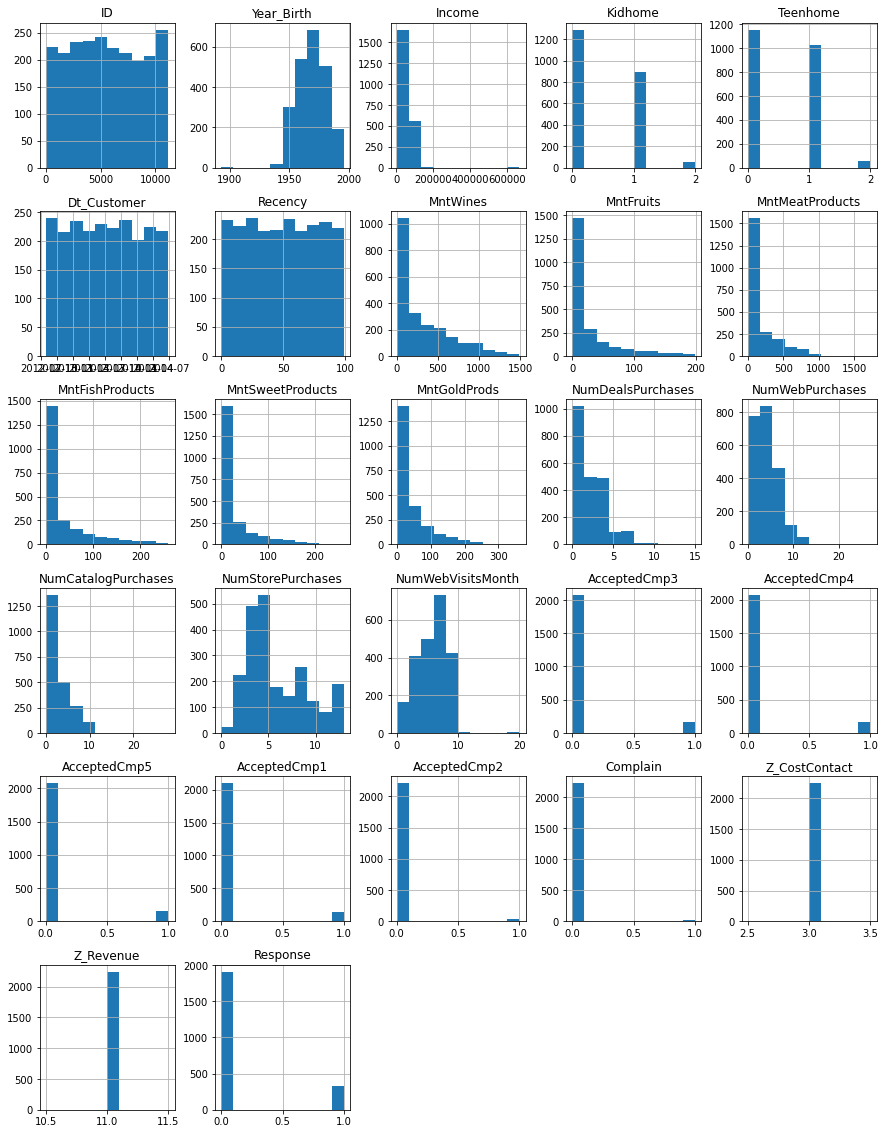

In [8]:
df.hist(figsize=(15,20))
plt.show()

**Verificação de valores nulos**

In [9]:
df.isnull().mean()*100

ID                     0.000000
Year_Birth             0.000000
Education              0.000000
Marital_Status         0.000000
Income                 1.071429
Kidhome                0.000000
Teenhome               0.000000
Dt_Customer            0.000000
Recency                0.000000
MntWines               0.000000
MntFruits              0.000000
MntMeatProducts        0.000000
MntFishProducts        0.000000
MntSweetProducts       0.000000
MntGoldProds           0.000000
NumDealsPurchases      0.000000
NumWebPurchases        0.000000
NumCatalogPurchases    0.000000
NumStorePurchases      0.000000
NumWebVisitsMonth      0.000000
AcceptedCmp3           0.000000
AcceptedCmp4           0.000000
AcceptedCmp5           0.000000
AcceptedCmp1           0.000000
AcceptedCmp2           0.000000
Complain               0.000000
Z_CostContact          0.000000
Z_Revenue              0.000000
Response               0.000000
dtype: float64

Aproximadamente 1% da variável 'Income' é nula e portanto plotaremos alguns gráficos para analisar o seu comportamento e decidir como prosseguir.

> A variável 'Income' apresenta alguns valores discrepantes dos demais. 

Mediana : 51381.5
Media : 52247.25135379061
Desvio : 25173.07666090141


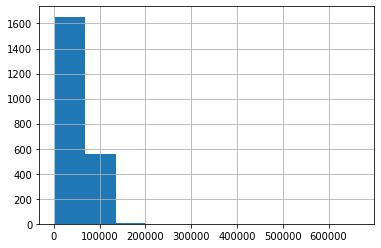

In [10]:
df.Income.hist()
print('Mediana :',df.Income.median())
print('Media :',df.Income.mean())
print('Desvio :',df.Income.std())
plt.show()

> O desvio dos números é bem grande, sendo mais uma evidência a respeito dos outliers presentes. No entanto para os valores nulos adotaremos a abordagem de inputar a mediana. Como são apenas 24 casos, 1% do dataset, podemos seguir dessa maneira.

In [11]:
df.Income.fillna(df.Income.median(),inplace=True)

**A respeito dos outliers**

    Outliers podem ser detectados usando vários métodos, como métodos estatísticos ou métodos gráficos. 
    Usaremos o método gráfico Box-Plot que nos permite visualizar o intervalo de nossos dados e plotar os outliers.

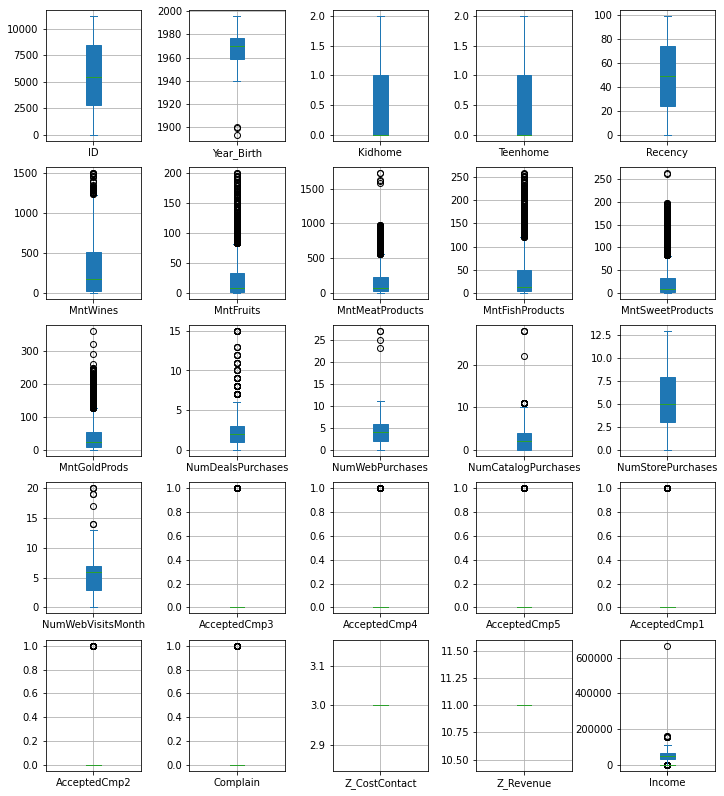

In [12]:
df[df.loc[:,(df.dtypes =='int64')].columns].plot(subplots =True,kind='box',figsize=(12,14),layout=(5,5),patch_artist=True,grid=True)
plt.subplots_adjust(wspace=0.5);
df.Income.plot(kind='box',patch_artist=True,grid=True)

Pelos gráficos vemos que boa parte das features com distribuição contínua possui outliers. Vale a pena investigar melhor, pois o padrão se repete em muitas features.

A princípio, vemos que a coluna Year_Birth possui alguns outliers quando < 1900, isso pode significar algum erro por dados antigos. Por esse motivo, removeremos essas linhas e avaliaremos novamente para verificar se funcionou.

In [13]:
df = df.loc[df.Year_Birth>1900,]

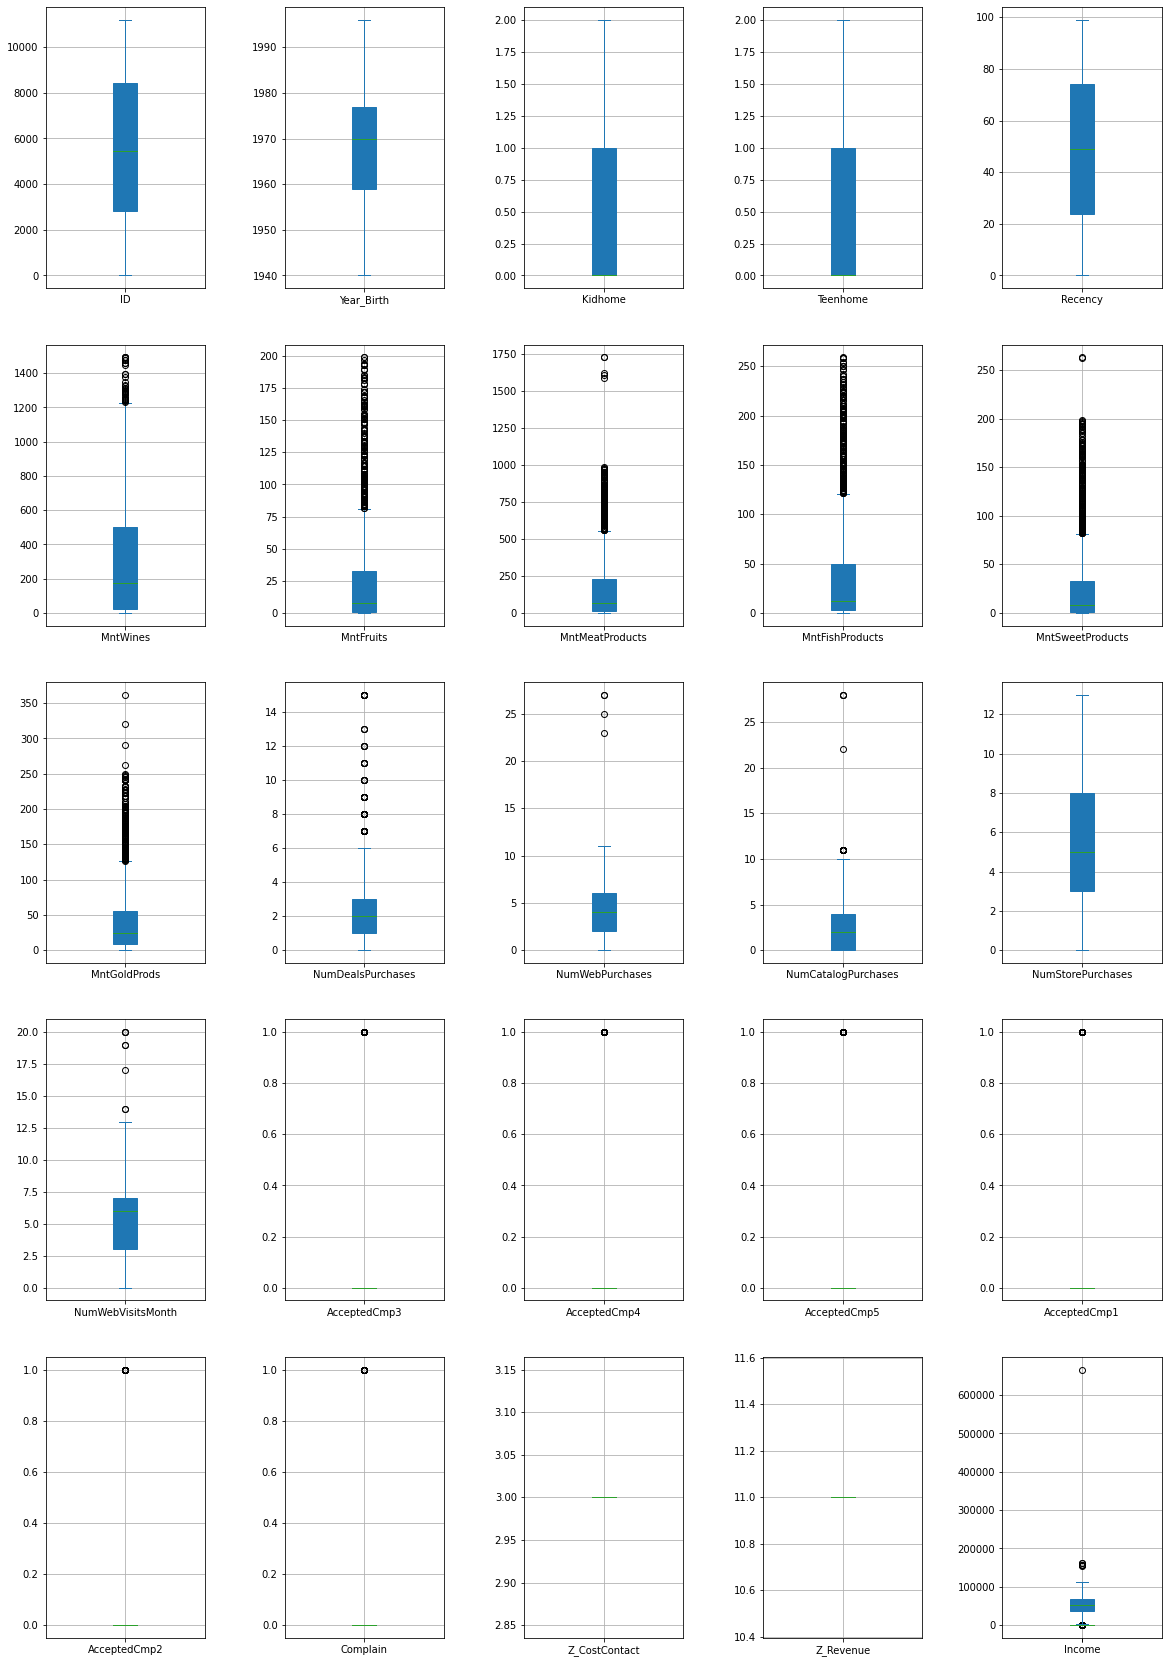

In [14]:
df[df.loc[:,(df.dtypes =='int64')].columns].plot(subplots =True,kind='box',figsize=(20,30),layout=(5,5),patch_artist=True,grid=True)
plt.subplots_adjust(wspace=0.5);
df.Income.plot(kind='box',patch_artist=True,grid=True)

> Existem outros possiveis outliers nos dados, no entanto vale a pena verificar se serão features importantes para construção de insights e observar se o comportamento atrapalha nos modelos ou até mesmo nos eventos que correspondem à nova realidade de alguns usuários para não deixar esse comportamento influenciar nas métricas. Usaremos a mediana.

Para construção de insight é interessante considerar a criação de novas features com os dados fornecidos, portanto : **Feature Engineering**

**Feature Engineering**

In [15]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [16]:
df.loc[:,'gasto_total'] = df.loc[:,df.columns.str.contains('Mnt')].sum(axis=1)
df.loc[:,'num_ofertas_total'] = df.loc[:,df.columns.str.contains('Purchase')].sum(axis=1)
df.loc[:,'dependentes'] = df.Kidhome + df.Teenhome
df.loc[:,'qt_aceite_campanha'] = df.loc[:,df.columns.str.contains('Cmp')].sum(axis=1) + df.Response
dic_education = {'Graduation':2, 'PhD':4, 'Master':3, '2n Cycle':1, 'Basic':0}
df.loc[:,'label_educa'] = df.loc[:,'Education'].map(dic_education)
df.loc[:,'idade'] = pd.datetime.today().year - df.Year_Birth 
df.loc[:,'ano_compra'] = df.Dt_Customer.dt.year

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  import sys


In [17]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,gasto_total,num_ofertas_total,dependentes,qt_aceite_campanha,label_educa,idade,ano_compra
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,1617,25,0,1,2,65,2012
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,27,6,2,0,2,68,2014
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,776,21,0,0,2,57,2013
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,53,8,1,0,2,38,2014
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,422,19,1,0,4,41,2014


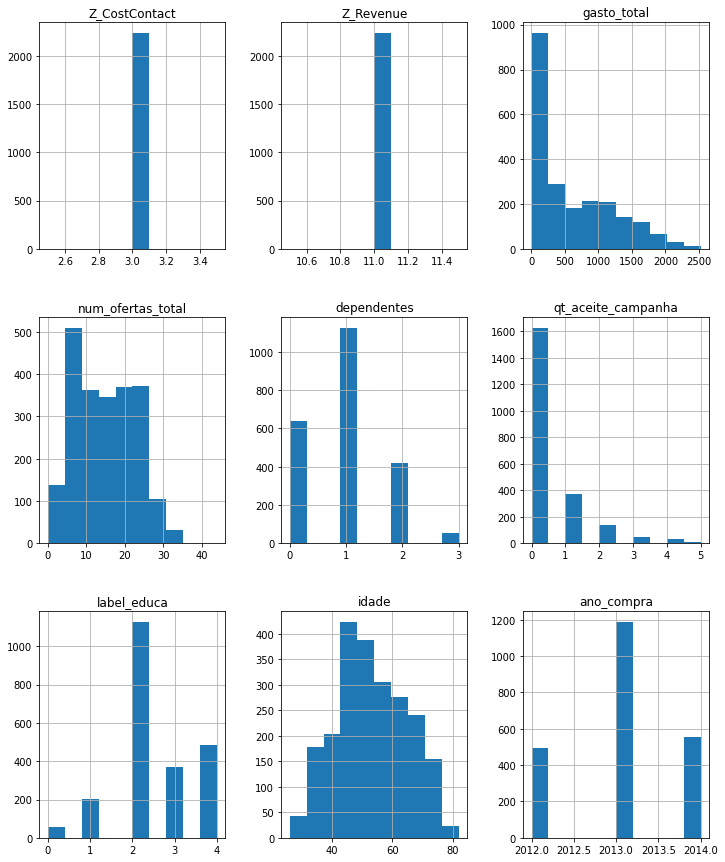

In [18]:
# como as variáveis Z_CostContact e Z_Revenue não constam na tabela de introdução decidi olhar o comportamento delas com relação as outras features criadas, no entanto a feature apresenta
# um único valor o que não fornece muita informação
df[['Z_CostContact', 'Z_Revenue','gasto_total', 'num_ofertas_total', 'dependentes', 'qt_aceite_campanha',
       'label_educa', 'idade', 'ano_compra']].hist(figsize=(12,15))
plt.show()


**Seção 02: Análise Estatística**

Faça testes estatísticos na forma de regressões para responder a essas perguntas e proponha recomendações de ações baseadas em dados ao seu CMO. Certifique-se de interpretar seus resultados com jargão não estatístico para que seu CMO possa entender suas descobertas.

Quais fatores estão significativamente relacionados ao número de compras na loja?

     Usaremos um modelo de regressão linear com NumStorePurchases como variável de destino e, em seguida, usaremos técnicas de explicabilidade de aprendizado de máquina para obter insights sobre quais recursos preveem o número de compras na loja


Algumas variáveis ainda são categóricas. Para criação de um modelo de ML é vantajoso que existam apenas variáveis não categóricas, para isso vamos observar as variáveis novamente para verificar se podemos fazer alguma transformação.

In [19]:
df.Marital_Status.value_counts()

Married     864
Together    579
Single      479
Divorced    231
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64

Podemos transformar em uma variável one hot para os casos com uma união e casos solteiros.

In [20]:
df.loc[df.Marital_Status.str.contains('Married|Together'),'Marital_Status'] = 1
df.loc[df.Marital_Status!=1,'Marital_Status'] = 0

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


> Temos aqui duas abordagens para seguir: quais fatores influenciam na quantidade de vezes que um usuário compra e quantidade de vezes que o usuário compra na loja, para isso podemos usar um modelo de regressão.

mean    14.870809
std      7.676593
min      0.000000
max     44.000000
Name: num_ofertas_total, dtype: float64

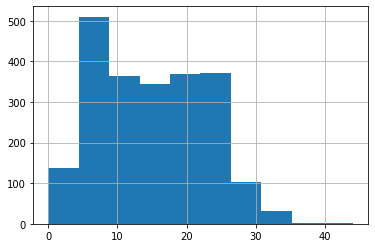

In [21]:
df.num_ofertas_total.hist()
df.num_ofertas_total.describe().loc[['mean','std','min','max']]

mean     5.794367
std      3.250940
min      0.000000
max     13.000000
Name: NumStorePurchases, dtype: float64

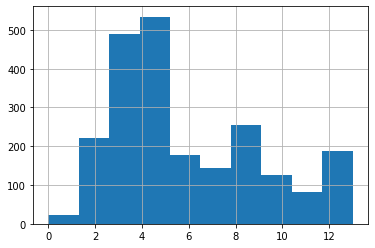

In [22]:
df.NumStorePurchases.hist()
df.NumStorePurchases.describe().loc[['mean','std','min','max']]

Vemos que em média um usuário compra 14 vezes em nossos serviços. As compras efetuadas na loja são em média 5 vezes, se conseguirmos prever quantas vezes cada usuário iria efetuar as compras, podemos elaborar melhores estratégias para aumentar nossos números.

**Section 03: Data Visualization**

Qual campanha de marketing é mais bem-sucedida?
    

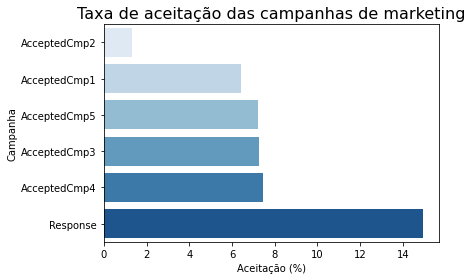

In [23]:
cam_success = pd.DataFrame(df[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']].mean()*100, 
                           columns=['Percent']).reset_index()

# plot
sns.barplot(x='Percent', y='index', data=cam_success.sort_values('Percent'), palette='Blues')
plt.xlabel('Aceitação (%)')
plt.ylabel('Campanha')
plt.title('Taxa de aceitação das campanhas de marketing', size=16);

    A campanha mais bem-sucedida é a mais recente (nome da coluna: Response)

> Qual o perfil médio do cliente da empresa ?


In [24]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'gasto_total', 'num_ofertas_total', 'dependentes', 'qt_aceite_campanha',
       'label_educa', 'idade', 'ano_compra'],
      dtype='object')

In [25]:
# list of cols with binary responses
binary_cols = [col for col in df.columns if 'Accepted' in col] + ['Response', 'Complain']

# list of cols for spending 
mnt_cols = [col for col in df.columns if 'Mnt' in col]

# list of cols for channels
channel_cols = [col for col in df.columns if 'Num' in col] + ['gasto_total', 'num_ofertas_total']

In [26]:
# average customer demographics
demographics = pd.DataFrame(round(df.drop(columns=binary_cols+mnt_cols+channel_cols).median(), 1), columns=['Average']).reindex([
    'idade', 'ano_compra', 'Income', 'dependentes', 'Recency','label_educa'])

demographics

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


,Average
idade,52.0
ano_compra,2013.0
Income,51381.5
dependentes,1.0
Recency,49.0
label_educa,2.0


    Idade média de 52 anos
    Tornou-se cliente em 2013
    Tem uma renda de aproximadamente R$ 51381 por ano
    Tem 1 dependente 
    Fez uma compra de nossa empresa nos últimos 49 dias e possui escolaridade de um bacharelado

> Quais produtos possuem maior representativade de venda?

Total gasto: 396.0


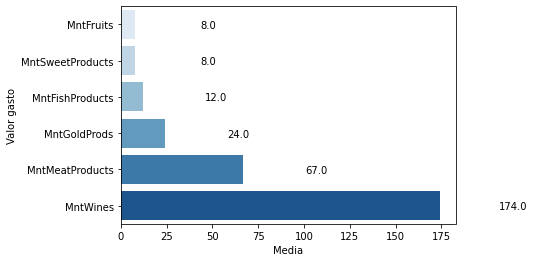

In [27]:
spending = pd.DataFrame(round(df[mnt_cols].median(), 1), columns=['Media']).sort_values(by='Media').reset_index()

# plot
ax = sns.barplot(x='Media', y='index', data=spending, palette='Blues')
plt.ylabel('Valor gasto')

## add text labels for each bar's value
for p,q in zip(ax.patches, spending['Media']):
    ax.text(x=q+40,
            y=p.get_y()+0.5,
            s=q,
            ha="center") ;
print('Total gasto:',df.gasto_total.median())

     O cliente médio gastou:
      * entre R$ 8 e R$ 24 em frutas, doces, peixes ou produtos de ouro
      *  Mais de R$ 67 em produtos de carne
      *  Mais de R$ 174 em vinhos
      *   Mais de R$ 396 no total
     Produtos com melhor desempenho: Vinhos e carnes

> Quais canais estão com baixo desempenho?

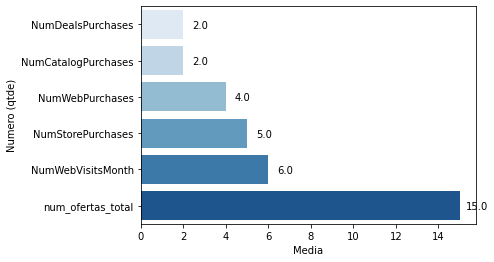

In [28]:
channels = pd.DataFrame(round(df[channel_cols].drop(columns='gasto_total').median(), 1), columns=['Media']).sort_values(by='Media').reset_index()

# plot
ax = sns.barplot(x='Media', y='index', data=channels, palette='Blues')
plt.ylabel('Numero (qtde)')

## add text labels for each bar's value
for p,q in zip(ax.patches, channels['Media']):
    ax.text(x=q+0.8,
            y=p.get_y()+0.5,
            s=q,
            ha="center") ;

     Em média os clientes :
         * fazem 2 compras de ofertas, 
         * fazem 2 compras de catálogo,
         * fazem 4 compras na web 
         * fazem 6 visitas ao site por mes
         * e fazem 5 compras na loja
        > em média de 15 compras são realizadas no total
        
     Canais com baixo desempenho:
         Campanhas publicitárias, ofertas e catálogo

**Conclusões**

    A aceitação da campanha publicitária está positivamente correlacionada com a renda e negativamente correlacionada com ter filhos/adolescentes.
    
    *Ação sugerida: crie dois fluxos de campanhas publicitárias direcionadas, uma voltada para indivíduos de alta renda sem crianças/adolescentes e outra voltada para indivíduos de baixa renda com crianças/adolescentes.
    Os produtos de maior sucesso são vinhos e carnes (ou seja, o cliente médio gastou mais nesses itens).
    
    *Ação sugerida: concentre as campanhas publicitárias no aumento das vendas dos itens menos populares.
    Os canais de baixo desempenho são ofertas e compras por catálogo (ou seja, o cliente médio fez menos compras por meio desses canais).
    Os canais com melhor desempenho são as compras na web e na loja (ou seja, o cliente médio fez mais compras por meio desses canais).
    
    *Ação sugerida: Focar as campanhas publicitárias nos canais de maior sucesso, para alcançar mais clientes.

In [29]:
df.MntWines.std()

336.5743823108805